#### Loan Application Status Prediction

#### Problem Statement:
    This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

#### Dependent Variable (Target Variable):

- Loan_Status

#### You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

#### Prolem statement:
    All financial institutions face the problem to identify loan defaulters before approving the loans. Though it may be a big bank or an micro finance institution, it is very important to reduce the loan defaulters. 
    
#### Objective:
    

#### load libraries

In [1]:
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# data analysis and wrangling
import pandas as pd
import numpy as np
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sn


#for Label encoding of categorical variables
from sklearn.preprocessing import LabelEncoder

# for feature selection
from sklearn.decomposition import PCA

# for feature scaling
from sklearn.preprocessing import StandardScaler

# to handle target feature data imbalance
from imblearn.over_sampling import RandomOverSampler

# 
from sklearn.model_selection import train_test_split


# logistic regression
from sklearn.linear_model import LogisticRegression

# import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#classification libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier

# for performance tuning
from sklearn.model_selection import GridSearchCV

#### load dataset

In [2]:
df=pd.read_csv('loan_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Step- Descriptive Analysis

first we will create a copy of the dataset for analysis purpose.

In [4]:
df_cp=pd.DataFrame(data=df,columns=df.columns)
df_cp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df_cp.shape

(614, 13)

Our dataset has $614$ rows of data. The whole data is divided among $12$ **Independent** features and **one target** feature.

In [6]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Some of the features are having less non-null count meaning there is missing data in dataset. Our dataset has $8$ **object** type features, $4$ **float64** type features and $1$ **int64** type feature.

In [7]:
dup_df=df_cp[df_cp.duplicated()]
dup_df.shape

(0, 13)

Our dataset donot have any **duplicated** records.

In [8]:
round(df_cp.isnull().sum()/df_cp.shape[0]*100,2).astype(str)+"%"

Loan_ID               0.0%
Gender               2.12%
Married              0.49%
Dependents           2.44%
Education             0.0%
Self_Employed        5.21%
ApplicantIncome       0.0%
CoapplicantIncome     0.0%
LoanAmount           3.58%
Loan_Amount_Term     2.28%
Credit_History       8.14%
Property_Area         0.0%
Loan_Status           0.0%
dtype: object

In our dataset,**Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History** features have missing/null values. The %ge of null values is much small so we will handle these missing values in data preprocessing after features analysis.

In [9]:
round(df_cp.isin([' ?']).sum()/df_cp.shape[0]*100,2).astype(str)+"%"

Loan_ID              0.0%
Gender               0.0%
Married              0.0%
Dependents           0.0%
Education            0.0%
Self_Employed        0.0%
ApplicantIncome      0.0%
CoapplicantIncome    0.0%
LoanAmount           0.0%
Loan_Amount_Term     0.0%
Credit_History       0.0%
Property_Area        0.0%
Loan_Status          0.0%
dtype: object

Our dataset does not have any null values in the form of **' ?'**

In [10]:
df_cp.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


From the *statistical summary of numerical features*, we observe that except **Credit_History** all other features have very high values of *standard deviation*. Also, there is differences between **mean** and **median** values, which points towards skewness.

## Step- Exploaratory data analysis

#### 1.'Loan_Id'

In [11]:
df_cp['Loan_ID'].value_counts()

LP002098    1
LP002467    1
LP001910    1
LP002690    1
LP002912    1
           ..
LP002348    1
LP001038    1
LP002792    1
LP001888    1
LP001005    1
Name: Loan_ID, Length: 614, dtype: int64

This is just an identification number for a loan request, so we will ignore it for analysis.

#### 2.'Gender'

In [12]:
df_cp['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
data_types_dict = {'Gender': str}

In [14]:
df_cp=df_cp.astype(data_types_dict)

In [15]:
df_cp['Gender'].value_counts()

Male      489
Female    112
nan        13
Name: Gender, dtype: int64

We have converted the 'Gender' category feature to **object** type from **int64**.

In [14]:
round(df_cp['Gender'].isnull().sum()/df_cp.shape[0]*100,2).astype('str')+"%"

'2.12%'

We will replace the *2.12%* of null values before exploring the **Gender** feature.

In [15]:
df_cp['Gender'].fillna('Male',inplace=True)

We replaced the missing values with most frequent value of the **Gender** feature, which is **Male**.

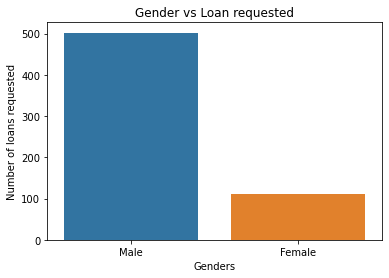

In [16]:
#plt.hist(df_cp['Gender'])
sn.countplot(df_cp['Gender'])
plt.xlabel('Genders')
plt.ylabel('Number of loans requested')
plt.title('Gender vs Loan requested')
plt.show()

From above plot we see that most of the **loan requests** have been from **Male** customers.

#### 3. 'Married'

In [17]:
df_cp['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [18]:
df_cp['Married']=df_cp['Married'].astype('object')

We have converted the 'Married' category feature to **object** type from **int64**.

In [19]:
df_cp['Married'].isnull().sum()

3

We will replace the **0.49% i.e.3** of null values before exploring the **Gender** feature.

In [20]:
df_cp['Married'].fillna('Yes',inplace=True)

We replaced the missing values with most frequent value of the **Married** feature, which is **Yes**.

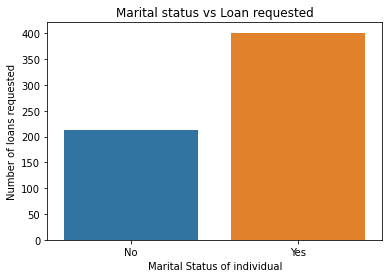

In [21]:
sn.countplot(df_cp['Married'])
plt.xlabel('Marital Status of individual')
plt.ylabel('Number of loans requested')
plt.title('Marital status vs Loan requested')
plt.show()

From above figure, we observe that most of the requested loans have been from **married customers.**

#### 4. 'Dependents'

In [22]:
df_cp['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [23]:
df_cp['Dependents']=df_cp['Dependents'].astype('object')

We have converted the 'Dependents' category feature to **object** type from **int64**.

In [24]:
df_cp['Dependents'].isnull().sum()

15

In [25]:
df_cp['Dependents'].fillna('0',inplace=True)

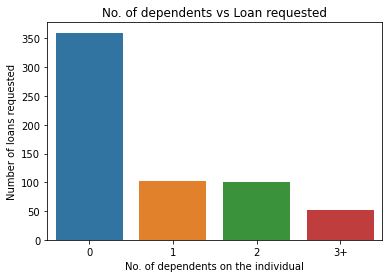

In [26]:
sn.countplot(df_cp['Dependents'])
plt.xlabel('No. of dependents on the individual')
plt.ylabel('Number of loans requested')
plt.title('No. of dependents vs Loan requested')
plt.show()

From above figure we see that **most of the loan requesting** individuals **do not have any dependent** family members. **Very few individuals** have **more than 3** people dependent on them.

#### 5.'Education'

In [27]:
df_cp['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [28]:
df_cp['Education']=df_cp['Education'].astype('object')

We have converted the 'Education' category feature to **object** type from **int64**.

In [29]:
df_cp['Education'].isnull().sum()

0

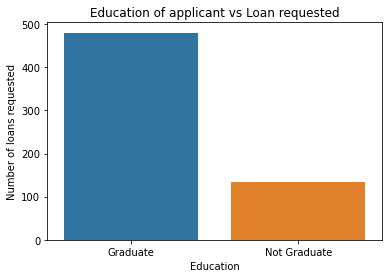

In [30]:
sn.countplot(df_cp['Education'])
plt.xlabel('Education')
plt.ylabel('Number of loans requested')
plt.title('Education of applicant vs Loan requested')
plt.show()

Most of the loan applications have come from applicants who are **Graduate** of any kind.

#### 6.'Self_Employed'

In [31]:
df_cp['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [32]:
df_cp['Self_Employed']=df_cp['Self_Employed'].astype('object')

We have converted the 'Self_Employed' category feature to **object** type from **int64**.

In [33]:
df_cp['Self_Employed'].isnull().sum()

32

We will replace the $32$ missing/null values with most frequent value, which is **No**

In [34]:
df_cp['Self_Employed'].fillna('No',inplace=True)

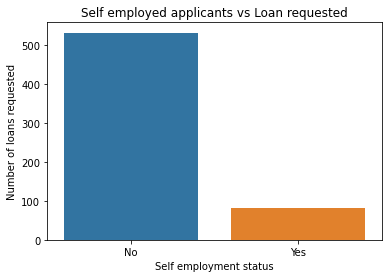

In [35]:
sn.countplot(df_cp['Self_Employed'])
plt.xlabel('Self employment status')
plt.ylabel('Number of loans requested')
plt.title('Self employed applicants vs Loan requested')
plt.show()

From above figure, we see that **Very few** loan applicants are self employed

#### 7.'ApplicantIncome'

In [36]:
df_cp['ApplicantIncome'].value_counts()

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [37]:
df_cp['ApplicantIncome'].isnull().sum()

0

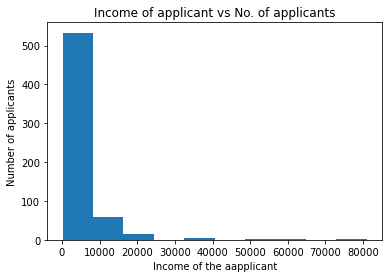

In [38]:
plt.hist(df_cp['ApplicantIncome'])
plt.xlabel('Income of the aapplicant')
plt.ylabel('Number of applicants')
plt.title('Income of applicant vs No. of applicants')
plt.show()

From above figure, we deduct the information that most of the loan applicants have income **less than** $10000$

#### 8.'CoapplicantIncome'

In [39]:
df_cp['CoapplicantIncome'].value_counts()

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [40]:
df_cp['CoapplicantIncome']=df_cp['CoapplicantIncome'].astype('float64')

In [41]:
df_cp['CoapplicantIncome'].isnull().sum()

0

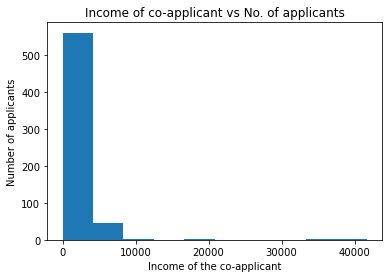

In [42]:
plt.hist(df_cp['CoapplicantIncome'])
plt.xlabel('Income of the co-applicant')
plt.ylabel('Number of applicants')
plt.title('Income of co-applicant vs No. of applicants')
plt.show()

From above figure, we deduct the information that most of the loan co-applicants also have income **less than** $10000$ like applicants.

#### 9.'LoanAmount'

In [43]:
df_cp['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [44]:
df_cp['LoanAmount']=df_cp['LoanAmount'].astype('float64')

In [45]:
df_cp['LoanAmount'].isnull().sum()

22

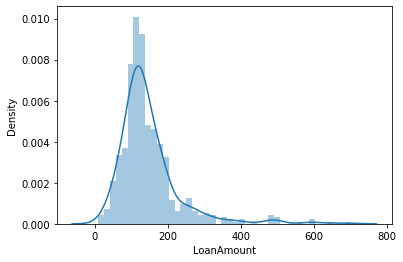

In [46]:
sn.distplot(df_cp['LoanAmount'])
plt.show()

We will replace the $22$ missing values from **LoanAmount** feature with the **mean** of the column as from above distplot we can see the distribution of data is normal i.e. bell shaped.

In [47]:
df_cp['LoanAmount'].fillna(df_cp['LoanAmount'].mean(),inplace=True)

From above distplot, we see that most of the loan applicantions have been for amount between $90-100$ .

#### 10.'Loan_Amount_Term'

In [48]:
df_cp['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [49]:
df_cp['Loan_Amount_Term'].isnull().sum()

14

We will replace the $14$ missing values from **Loan_Amount_Term** feature with the **most frequent value** of the column which is $360$.

In [50]:
df_cp['Loan_Amount_Term'].fillna(360,inplace=True)

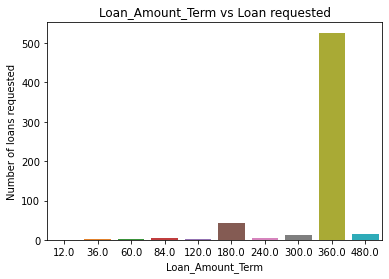

In [51]:
sn.countplot(df_cp['Loan_Amount_Term'])
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Number of loans requested')
plt.title('Loan_Amount_Term vs Loan requested')
plt.show()

From above distplot, we see that most of the loan amount term have been **360 days .**

#### 11.'Credit_History'

In [52]:
df_cp['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [53]:
df_cp['Credit_History']=df_cp['Credit_History'].astype('object')

In [54]:
df_cp['Credit_History'].isnull().sum()

50

We will replace the $50$ missing values from **Credit_History** feature with the **most frquent value** of the column which is $1$.

In [55]:
df_cp['Credit_History'].fillna('1.0',inplace=True)

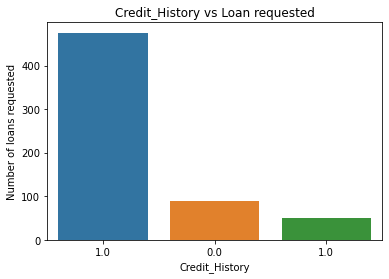

In [56]:
sn.countplot(df_cp['Credit_History'])
plt.xlabel('Credit_History')
plt.ylabel('Number of loans requested')
plt.title('Credit_History vs Loan requested')
plt.show()

From above figure we see that, most of the loan applications have credit history.

#### 12.'Property_Area'

In [57]:
df_cp['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [58]:
df_cp['Property_Area']=df_cp['Property_Area'].astype('object')

In [59]:
df_cp['Property_Area'].isnull().sum()

0

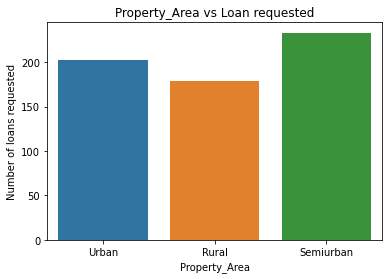

In [60]:
sn.countplot(df_cp['Property_Area'])
plt.xlabel('Property_Area')
plt.ylabel('Number of loans requested')
plt.title('Property_Area vs Loan requested')
plt.show()

From above plot, we see that loan applications have been constant from all property areas.

#### 13.'Loan_Status'

In [61]:
df_cp['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [62]:
df_cp['Loan_Status']=df_cp['Loan_Status'].astype('object')

In [63]:
df_cp['Loan_Status'].isnull().sum()

0

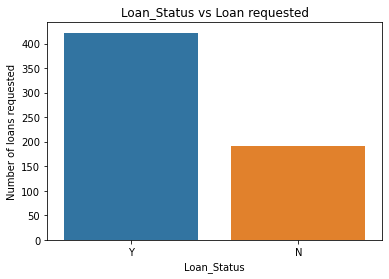

In [64]:
sn.countplot(df_cp['Loan_Status'])
plt.xlabel('Loan_Status')
plt.ylabel('Number of loans requested')
plt.title('Loan_Status vs Loan requested')
plt.show()

from above plot we see that our target variable is not balanced with both the outcomes. We will handle this **imbalancing** in further steps.

## Step- Data Preprocessing

#### check for outliers

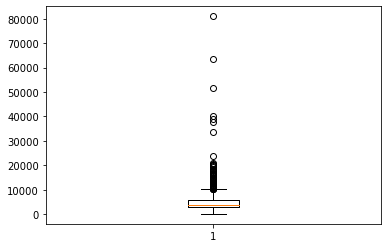

In [65]:
plt.boxplot(df_cp['ApplicantIncome'])
plt.show()

In above boxplot of 'ApplicantIncome' , the higher values away from whiskers may be high income of some of the applicants.

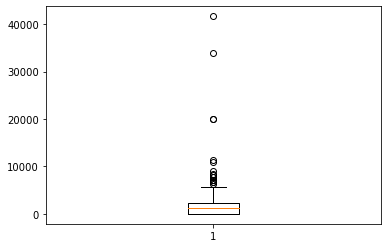

In [66]:
plt.boxplot(df_cp['CoapplicantIncome'])
plt.show()

In above boxplot of 'CoapplicantIncome' , the higher values away from whiskers may be high income of some of the co-applicants.

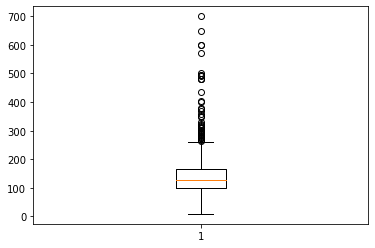

In [67]:
plt.boxplot(df_cp['LoanAmount'])
plt.show()

In above boxplot of 'LoanAmount' , the higher values away from whiskers may be the large loan amounts requested by applicants.

#### Feature selection

Before proceeding further, we will remove the 'Loan_ID' feature as it has no importance for prediction.

In [68]:
df_cp.drop('Loan_ID',axis=1,inplace=True)

#### Label encoding of categorical variables

In [69]:
le=LabelEncoder()

In [70]:
for col in df_cp.columns:
    if df_cp[col].dtypes=='object':
        df_cp[col]=le.fit_transform(df_cp[col])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [72]:
df_cp.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object